In [1]:
import cobra
from glob import glob
from pathlib import Path
import matplotlib.pyplot as pp
import seaborn as sb

In [2]:
sb.set(style='whitegrid', context='paper')

In [3]:
figpath = Path('../images/supplements/')

# Objective fraction

In [4]:
model_path = Path('../generated_models/models_paramscan_gimme/')
files_control = glob(str(model_path / 'control_objfrac_*.xml'))
files_mito = glob(str(model_path / 'mito_objfrac_*.xml'))

In [5]:
files_control.sort()
files_mito.sort()

In [6]:
models_control = [cobra.io.read_sbml_model(file) for file in files_control]
models_mito = [cobra.io.read_sbml_model(file) for file in files_mito]

tags_control = [Path(name).stem.split("_")[-1] for name in files_control]
tags_mito = [Path(name).stem.split("_")[-1] for name in files_mito]

sols_mito = [model.optimize() for model in models_mito]
sols_control = [model.optimize() for model in models_control]

obj_mito = [sol.objective_value for sol in sols_mito]
obj_control = [sol.objective_value for sol in sols_control]

dict_sols_mito = dict(zip(tags_mito, sols_mito))
dict_sols_control = dict(zip(tags_control, sols_control))

dict_models_mito = dict(zip(tags_mito, models_mito))
dict_models_control = dict(zip(tags_control, models_control))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27


In [7]:
xlabel = 'fraction of optimum (%) used for GIMME'

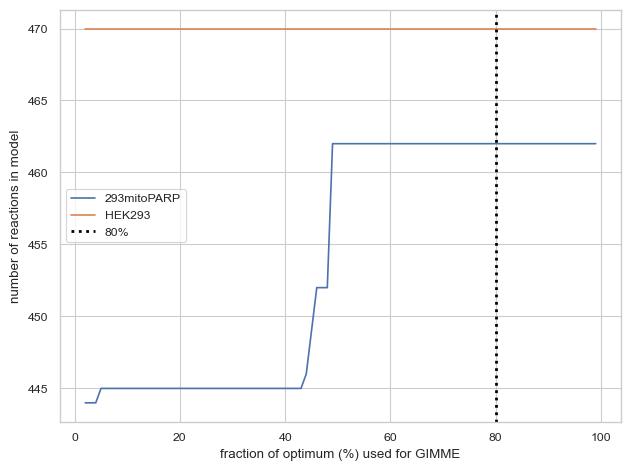

In [8]:
fig, ax = pp.subplots()
ax.plot([100 * float(x) for x in tags_mito][1:-1], [len(m.reactions) for m in models_mito][1:-1], label='293mitoPARP')
ax.plot([100 * float(x) for x in tags_control][1:-1], [len(m.reactions) for m in models_control][1:-1], label='HEK293')
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel('number of reactions in model')
ax.axvline(80, color='black', linestyle=':', linewidth=2., label='80%')
ax.legend()
pp.tight_layout()
fig.savefig(figpath / 'number_reactions.svg')

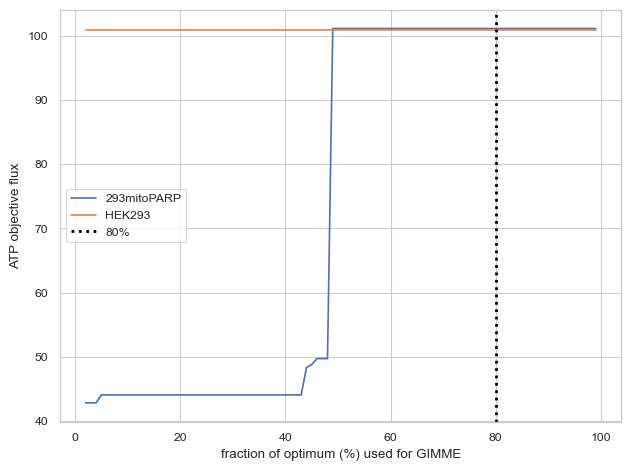

In [9]:
fig, ax = pp.subplots()
ax.plot(
    [100 * float(x) for x in tags_mito][1:-1], 
    [ x + .25 for x in obj_mito[1:-1]], 
    label='293mitoPARP'
    )
ax.plot([100 * float(x) for x in tags_control][1:-1], obj_control[1:-1], label='HEK293')
ax.legend()
ax.set_xlabel(xlabel)
ax.set_ylabel('ATP objective flux')
ax.axvline(80, color='black', linestyle=':', linewidth=2., label='80%')
ax.legend()
pp.tight_layout()
fig.savefig(figpath / 'atp_flux.svg')